In [3]:
%install_ext https://raw.githubusercontent.com/joelkim/ipython-tikzmagic/master/tikzmagic.py

Installed tikzmagic.py. To use it, type:
  %load_ext tikzmagic


In [2]:
%load_ext tikzmagic

# 공분산과 상관계수

두 개 이상의 서로 관련을 가지는 자료 값의 집합들이나 혹은 확률 변수들의 관계 즉 결합 분포는 heatmap과 같은 서술 통계 방법으로 묘사하거나 결합 확률 분포를 사용하여 정의한다.

서술 통계 방법이나 결합 확률 분포에 대해서는 다음 노트북을 참조한다.

[[school_notebook:69b85ec9afb7415d8da4c8cd5e46d22e]]

[[school_notebook:e08074f293144eeca9cc7251b5d5666c]]

다변수 확률 변수도 단변수의 경우처럼 평균, 분산과 같은 대표값을 가질 수 있다. 그 중 가장 중요한 것이 자료 간의 상관 관계를 나타내는 공분산(covariance)과 상관계수(correlation coefficient)이다. 공분산과 상관계수도 샘플 자료 집합에 대해 정의되는 샘플 공분산, 샘플 상관계수와 확률 변수에 대해 정의되는 공분산, 상관계수가 있다.

## 샘플 공분산

샘플 공분산(sample covariance)은 다음과 같이 정의된다. 여기에서 $x_i$와 $y_i$는 각각 $i$번째의 $x$ 자료와 $y$자료의 값을 가리키고, $m_x$와 $m_y$는 $x$ 자료와 $y$자료의 샘플 평균을 가리킨다.

$$ s^2_{xy} = \dfrac{1}{N-1}\sum_{i=1}^{N} (x_i-m_x)(y_i-m_y) $$

샘플 분산과 마찬가지로 샘플 공분산도 자료가 평균값으로부터 얼마나 떨어져 있는지를 나타낸것이다. 공분산은 평균값 위치와 샘플 위치를 연결하는 사각형의 면적을 사용한다. 다만 공분산의 경우에는 자료의 위치에 따라 이 값의 부호가 달라진다.

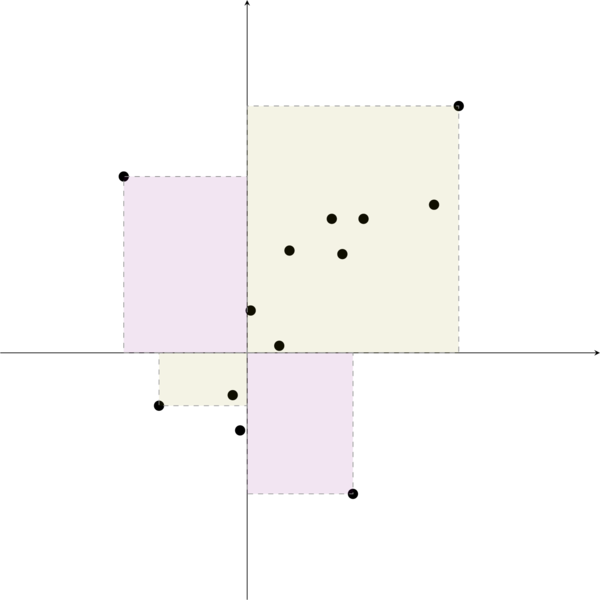

In [45]:
%%tikz -p pgfplots,pgffor -s 600,600
\begin{axis}[width=400pt, height=400pt, axis y line=center, axis x line=middle, ticks=none, xmin=-0.7, xmax=1, ymin=-0.7, ymax=1]
\foreach \x/\y in {0.6/0.7, -0.25/-0.15, 0.3/-0.4, -0.35/0.5,
                   -0.02/-0.22, -0.041/-0.12, 0.01/0.12, 0.091/0.02, 0.12/0.29, 0.24/0.38, 0.27/0.28, 0.33/0.38, 0.53/0.42} {
  \edef\temp{\noexpand\fill (axis cs:\x, \y) circle (3pt);}\temp
}
\draw[gray, dashed, fill=olive, fill opacity=0.1] (axis cs:0,0) rectangle (axis cs:0.6,0.7);
\draw[gray, dashed, fill=olive, fill opacity=0.1] (axis cs:0,0) rectangle (axis cs:-0.25,-0.15);
\draw[gray, dashed, fill=violet, fill opacity=0.1] (axis cs:0,0) rectangle (axis cs:0.3,-0.4);
\draw[gray, dashed, fill=violet, fill opacity=0.1] (axis cs:0,0) rectangle (axis cs:-0.35,0.5);
\end{axis}

그림에서 보듯이 공분산은 결합 분포의 평균을 중심으로 각 자료들이 어떻게 분포되어 있는지를 보여준다.

자료가 1사분면과 3사분면에 있는 경우 즉, 같은 부호를 가지는 경우에는 양의 방향으로 값이 커지고 자료가 2사분면이나 4사분면에 있는 경우에는 값의 부호가 음수가 된다.

따라서 공분산의 부호는 자료가 같은 부호를 가지는지 다른 부호를 가지는지에 대한 일종의 방향성을 제시한다고 볼 수 있다.

## 샘플 상관계수

샘플 공분산은 평균을 중심으로 각 자료들이 어떻게 분포되어 있는지 크기와 방향성을 같이 보여준다. 그런데 분포의 크기는 공분산이 아닌 분산만으로도 알 수 있기 때문에 대부분의 경우 자료 분포의 방향성만 분리하여 보는 것이 유용한다. 이 때 필요한 것이 샘플 상관계수(sample correlation coefficient)이다.

샘플 상관계수는 다음과 같이 공분산을 각각의 샘플 표준편차값으로 나누어 정규화(normalize)하여 정의한다.


$$ r_{xy} = \dfrac{s^2_{xy}}{\sqrt{s^2_{x} \cdot s^2_{y}}} $$



## 확률 변수의 공분산과 상관계수

두 확률 변수 $X$와 $Y$의 공분산은 기댓값 연산자를 사용하여 다음과 같이 정의된다.

$$ \text{Cov}[X, Y] = \text{E}[(X - \text{E}[X])(Y - \text{E}[Y])]$$

마찬가지로 두 확률 변수 $X$와 $Y$의 상관 계수도 다음과 같이 정의한다.

$$ \rho[X,Y] =  \dfrac{\text{Cov}[X, Y]}{\sqrt{\text{Var}[X] \cdot \text{Var}[Y]}} $$

확률 변수의 상관계수는 다음과 같은 성질을 가진다.

$$ -1 \leq \rho \leq 1 $$



또한 $\rho$가 -1, 0, 1인 경우를 각각 다음과 같이 부른다.

* $\rho = 1$ : 완전 선형 상관 관계
* $\rho = 0$ : 무상관 (독립과는 다름)
* $\rho = −1$ : 완전 선형 반상관 관계



이 상관계수의 부호와 크기가 의미하는 바는 다음 그림에서 알 수 있다.

<img src="https://datascienceschool.net/upfiles/e01bb77e55da4dbc8fb3fd60a707b050.png" width=100%>

상관계수로 분포의 형상을 추측할 때 주의할 점은 개별 자료가 상관계수에 미치는 영향력이 각각 다르다는 점이다. 다음은 [Frank Anscombe]( https://en.wikipedia.org/wiki/Frank_Anscombe)의 논문에 예시된 자료로 모두 상관계수를 포함한 통계적 특성이 동일하다. 상관계수의 값은 약 0.816이다.

상관계수 세번째와 네번째 자료에서 볼 수 있듯이 나머지 자료의 상관계수가 정확히 1 또는 0인 경우에도 단 하나의 특이값 자료에 의해 전체 상관계수가 크게 달라질 수 있다.

<img src="https://datascienceschool.net/upfiles/8ae324a8f7534d8d929e3191efddb208.png" width=100%>